# <font color="purple">18-Convection</font> (template)


We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [2]:
import numpy as np, copy
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

import matplotlib.colors as cl
from matplotlib.collections import LineCollection

## 1. To execute: Opening Mesa structure models

We have been using models from the MESA structure and evolution code already. Please take some time to read the paper describing the code: http://iopscience.iop.org/article/10.1088/0067-0049/192/1/3/pdf. (Note, make sure to download it while on campus for free access).

You can open the file with text edit, and you can see that it contains a whole set of columns with the values of parameters at different depths in the star.

For this notebook, I provide you with two models:
1. present-day model of the Sun (18-Sun-profile.data)
2. model of a star with an initial mass of 10$M_\odot$, as a similar evolution stage (18-M10-profile.data)

The function below reads in a MESA model into a numpy "rec array".  

In [3]:
def read_model(file):

    return np.genfromtxt(file, skip_header=5, names=True)

Here's a command that will show you the names of all the columns in the file. You can access a column by doing: data['column name'].

In [4]:
file_url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-Sun-profile8.data'

data = read_model(file_url)

print(data.dtype.names)

('zone', 'logT', 'logRho', 'logP', 'logR', 'luminosity', 'eps_grav', 'signed_log_eps_grav', 'net_energy', 'signed_log_power', 'velocity', 'entropy', 'mixing_type', 'csound', 'v_div_csound', 'eta', 'mu', 'logdq', 'dq_ratio', 'q', 'log_q', 'radius', 'rmid', 'temperature', 'tau', 'logtau', 'pressure', 'pgas_div_ptotal', 'logPgas', 'grada', 'free_e', 'x_mass_fraction_H', 'y_mass_fraction_He', 'z_mass_fraction_metals', 'abar', 'ye', 'log_opacity', 'eps_nuc', 'd_lnepsnuc_dlnd', 'd_lnepsnuc_dlnT', 'non_nuc_neu', 'mlt_mixing_length', 'mlt_mixing_type', 'gradT_sub_grada', 'gradT_div_grada', 'log_mlt_Gamma', 'log_D_mix', 'log_conv_vel', 'conv_vel_div_csound', 'log_mlt_D_mix', 'pressure_scale_height', 'gradT', 'gradr', 'mass', 'logxq', 'logxm', 'x', 'y', 'z', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'o18', 'ne20', 'ne22', 'mg24', 'pp', 'cno', 'tri_alfa', 'burn_c', 'burn_n', 'burn_o', 'burn_ne', 'burn_na', 'burn_mg', 'burn_si', 'burn_s', 'burn_ar', 'burn_ca', 'burn_ti', 'burn_cr', 'burn_fe', 'c12_

## 2. To execute: I will show you how to use a quite nifty function that creates colored lines

In [5]:
def data_lines(x, y, z, min_col, max_col, cmap):
    points = np.array([x, y]).T.reshape(-1, 1, 2)

    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=plt.get_cmap(cmap),
                    norm=plt.Normalize(min_col, max_col))
    lc.set_array(z)
    lc.set_linewidth(2)
    
    return lc

Here I create a color map that is called cm_plusmin, by defining 256 RGB values.

This is taken from an excellent compilation of B&W and color-blind friendly color maps: https://personal.sron.nl/~pault/

In [6]:
cols = []
for x in np.linspace(0,1, 256):
    rcol = 0.237 - 2.13*x + 26.92*x**2 - 65.5*x**3 + 63.5*x**4 - 22.36*x**5
    gcol = ((0.572 + 1.524*x - 1.811*x**2)/(1 - 0.291*x + 0.1574*x**2))**2
    bcol = 1/(1.579 - 4.03*x + 12.92*x**2 - 31.4*x**3 + 48.6*x**4 - 23.36*x**5)
    cols.append((rcol, gcol, bcol))

cm_plusmin = cl.LinearSegmentedColormap.from_list("PaulT_plusmin", cols)

## 3. Let's first look at the opacity inside of stars. 

As we discussed in class, the convection is more likely when the $\nabla_\mathrm{rad}$ ($=\nabla_\mathrm{med}$) is large. 

As the opacity is part of the equation for $\nabla_\mathrm{rad}$, it would be a good idea to see how it varies inside of stars. 

We will look at a graph of $\log(T)$ versus $\log(\rho)$, which will also be very useful to visualize the radial profile of stars of various masses. 

### a. In class: we will do the Sun.

### b. At home: add a colored line for the $10 M_\odot$ model. 

> **TODO**: Add a colored line in the graph for the $10 M_\odot$ model. Dont' forget to label your axes.

Text(0, 0.5, 'log(T)')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


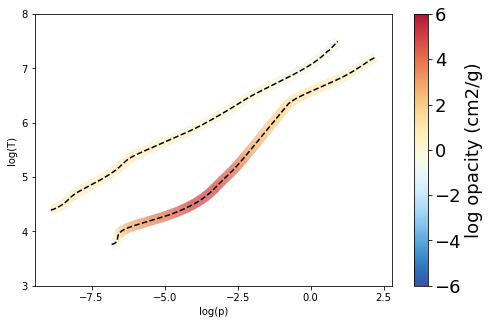

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Times New Roman'})

ax.set_ylim(-7,4)
ax.set_ylim(3,8)

# Define the min and max values for the color range
min_col = -6
max_col = 6

###########################
###########################
# In class

file_url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-Sun-profile8.data'
data = read_model(file_url)

# Create a line collection for the solar model

lc1 = data_lines(data['logRho'], data['logT'], data['log_opacity'], min_col, max_col, cm_plusmin)
lc1.set_linewidth(10)
cax = ax.add_collection(lc1)

# Add dashed lines to show the data better

ax.plot(data['logRho'], data['logT'], c='k', ls='--')

# Add a color bar and a label

banana = plt.colorbar(cax)
banana.ax.set_ylabel('log opacity (cm2/g)')

###########################
###########################
# At home: add the colored line for the M10 model.

file_url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-M10-profile8.data'

# Create a line collection for the 10Msun model

data10 = read_model(file_url)

lc10 = data_lines(data10['logRho'], data10['logT'], data10['log_opacity'], min_col, max_col, cm_plusmin)
lc10.set_linewidth(10)
cax = ax.add_collection(lc10)

ax.plot(data10['logRho'], data10['logT'], c='k', ls='--')
ax.set_xlabel("log(p)")
ax.set_ylabel("log(T)")



> **TODO**: Interpretatation:
1. In the graph, which end of the curves represent the stellar surface?
2. How does the opacity compares with Fig. 3 of Paxton et al. 2011?
3. Comment on the change in opacity as a function of position inside of the star for each model. This will be useful for your intrepretation of #4

1. The stellar surface is on the left side of the graph.
2. The opacity measured here matches the Paxton et al. model pretty well.
3. The opacity of the star is close to 0 at the core but as it gets to the surface it increases. After such time it then drops off at the surface.

## 4. Convections in main sequence stars.

In the models, the values of $\nabla_\mathrm{real}$, $\nabla_\mathrm{rad}$ ($=\nabla_\mathrm{medium}$), and $\nabla_\mathrm{ad}$ are in columns named 'gradT', 'gradr', and 'grada', respectively. 

Note: the radius is in units of solar radii for all models. 


### a. In class: Let's see how these look in a solar model.

### b. At home: Do the same for the 10$M_\odot$ model.

> **TODO** Do the same for the 10$M_\odot$ model in the right-hand plot. Don't forget to label your axes and add legend items for each curves

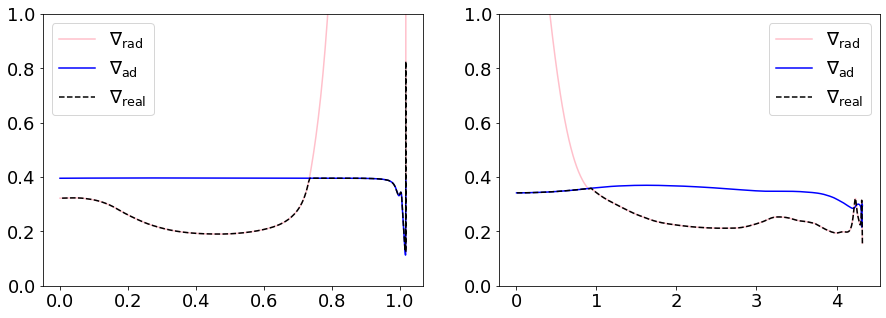

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Times New Roman'})



###########################
###########################
# In class
file_url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-Sun-profile8.data'
data = read_model(file_url)

ax[0].plot(10**data['logR'], data['gradr'], c='pink', label=r'$\nabla_\mathrm{rad}$')
ax[0].plot(10**data['logR'], data['grada'], c='blue', label=r'$\nabla_\mathrm{ad}$')
ax[0].plot(10**data['logR'], data['gradT'], c='k', ls='--', label=r'$\nabla_\mathrm{real}$')

ax[0].set_ylim(0,1)

ax[0].legend(loc=0)
###########################
###########################
# At home
file_url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-M10-profile8.data'
data10 = read_model(file_url)

ax[1].plot(10**data10['logR'], data10['gradr'], c='pink', label=r'$\nabla_\mathrm{rad}$')
ax[1].plot(10**data10['logR'], data10['grada'], c='blue', label=r'$\nabla_\mathrm{ad}$')
ax[1].plot(10**data10['logR'], data10['gradT'], c='k', ls='--', label=r'$\nabla_\mathrm{real}$')

ax[1].set_ylim(0,1)

ax[1].legend(loc=0)

> **TODO**: <font color="red">Interpretation:</font> 
>
>1. For each star, where is the condition for instability fulfilled?
>2. For each star, explain the behavior of the real temperature gradient.
>3. There is a very famous graph in the Kippenhahn (22.7 in first edition, reproduced in the lecture slides). Based on this graph and the ones you just made, comment on the change in energy transport as a function of stellar mass.

1. The system becomes unstable when $\nabla_{med} > \nabla_{ad}$. In the first case, the system becomes unstable at around 0.75. In the second case, the system is unstable before 1.
2. In the first star, the real gradient matches the rad until it is equal to ad, then matches that. In the second, the system does the opposite.
3. The lower the stellar mass, the more the of the surface that is convective. On the opposite end, the greater the stellar mass, the more the core is convective.